In [3]:
import matplotlib.pyplot as plt
import simulation as sim

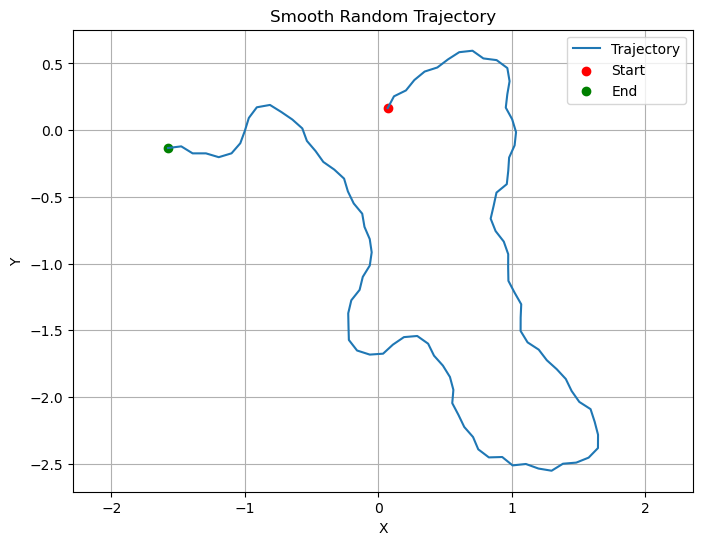

In [7]:
# Example usage:
total_time = 10  # Total time of simulation
time_step = 0.1  # Time step
speed = 1.0  # Constant speed

head_directions, positions = sim.smooth_random_trajectory(total_time, time_step, speed)
# Plot trajectory
plt.figure(figsize=(8, 6))
plt.plot(positions[:, 0], positions[:, 1], label='Trajectory')
plt.scatter(positions[0, 0], positions[0, 1], color='red', label='Start')
plt.scatter(positions[-1, 0], positions[-1, 1], color='green', label='End')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Smooth Random Trajectory')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()